# Machine Learning for Regression

This project is about the creation of a model for helping users to predict car prices.

## 2.1 Project plan:

- Prepare data and Exploratory data analysis (EDA)
- Use linear regression for predicting price
- Understanding the internals of linear regression
- Evaluating the model with RMSE
- Feature engineering
- Regularization
- Using the model

## 2.2 Data Preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
# from matplotlib.plyplot as plt

In [2]:
df = pd.read_csv("car_price_data.csv")
# df = pd.DataFrame(df)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.columns
# df = df.columns.str.lower().replace(" ", "_")
# df

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
# from the cell to the end of data prep, we want to make the data consistent which includes the column names and its content

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes # the data types for all the columns

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# get all the objects
# df.dtypes == 'object' # this returns the list of columns with true or false
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
# to get access to the index
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [11]:
# turn it into a python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [12]:
# this is if we are formatting the contents of just one column

df['make'].str.lower().str.replace(" ", "_")

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [13]:
# this loop helps format all the contents of the table

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
# for every df[col], we want to use --df[col].str.lower().str.replace(' ', '_')-- to change all the content
# of the dataset to lowercase letters and join them with underscores

In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis

In [15]:
# we want to check all the columns to check what kind of data they have for example

for col in df.columns: # used this to get all the unique values for the dataset
# for col in strings: # used this to get all the unique values for the string data type in the object
    print(col)
#     print(df[col].head())
    print(df[col].unique()) # this lists out all the unique values
    print(df[col].nunique()) # this gives us the total unique values in numbers
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti'

In [16]:
# df[col].unique()
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [17]:
for col in df.columns:
#     print(col)
#     print(df[col].head())
#     print(df[col].unique())
    print(df[col].unique()[:5]) # gives us the first five values of all unique values
    print(df[col].nunique())
    print()

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

['1_series_m' '1_series' '100' '124_spider' '190-class']
914

[2011 2012 2013 1992 1993]
28

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

[335. 300. 230. 320. 172.]
356

[ 6.  4.  5.  8. 12.]
9

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

[ 2.  4.  3. nan]
3

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

['compact' 'midsize' 'large']
3

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

[26 28 27 25 24]
59

[19 20 18 17 16]
69

[3916 3105  819  617 1013]
48

[46135 40650 36350 29450 34500]
6049



### Distribution of Price

In [18]:
# for this session, we want to look closer at the price column

# %matplotlib inline # assure that plots are displayed in jupyter notebook's cells

<Axes: xlabel='msrp', ylabel='Count'>

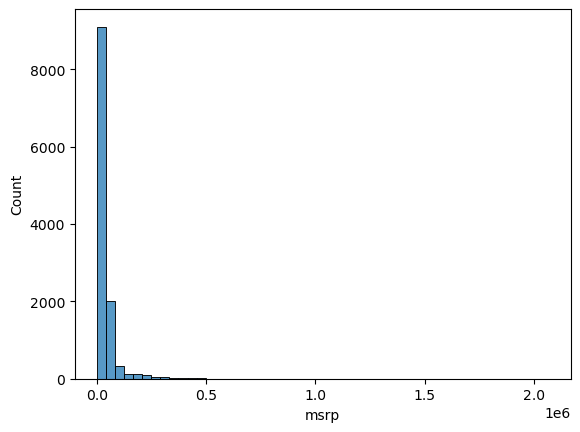

In [19]:
%matplotlib inline
sns.histplot(df.msrp, bins=50) # show the histogram of a series

From the graph above, **1e6** represents 1million. It shows that most cars are pretty cheap within the 0.0 - 0.5. There are very few cars that are pretty expensive between 1.0 (1 million) - 2.0 (2 million).  

The kind of distribution shown above is known as a **LONG TAIL** distribution because you can think of 0.5 - 2.0 as a tail cos they are very shallow. Most of the data is concentrated with 0.0 - 0.5. It is common to see the long tail distribution in prices because most of the things are cheap for general public while there are a few super expensive ones which only few people can afford. 

To get a better view of the graphical data, we need to zoom in. We do this by checking the prices based on conditions

<Axes: xlabel='msrp', ylabel='Count'>

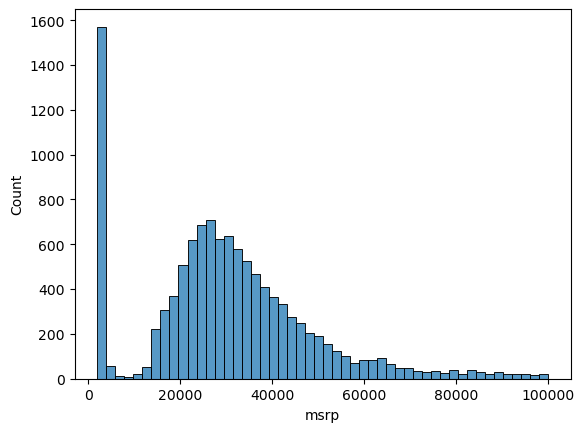

In [20]:
# we want to concentrate on the area of the graph where the data is concentrated (we ignore the tail)
%matplotlib inline
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

We observe that most of the cars costs $1000$. Then it starts to go up and attains a peak at about $25,000$ and starts to go down from there. The only strange thing in the distribution/graph is the $1000$ peak.

This kind of distribution is not good for machine learning because the tail will confuse our model. The solution is to get rid of the long tail by applying the **logarithm distribution**. We apply the logarithm to the price in order to get more compact values.



In [21]:
# np.log([0, 1, 10, 1000, 100000]) 
# just using np.log will produce problems when there is 0 because the logarithm of 0 does not exist
# to solve this, we add + 1 to each of the numbers

# np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1]) to this better:

np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [22]:
# to apply the logarithm to our price
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

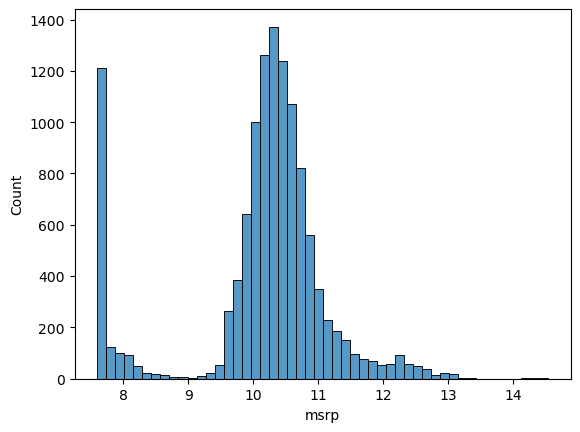

In [23]:
%matplotlib inline
sns.histplot(price_logs, bins=50)

We observe that from the graph above that the tail is gone. The graph above is known as **Normal Distribution**. With this kind of distribution, we have a clear center of distribution and this is ideal for models as they do better at prediction than with long tail distribution. Long tail distributions normally confuse models.

### Missing Values

In [24]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the Validation Framework

We want to split our dataset into 3:
- TRAIN: X is our feature matrix and y is our target variable - $$X_t y_t$$ 

- VALIDATION: $$X_v y_v$$

- TEST: $$X_test y_test$$

The split is done in 60, 20 and 20 percent split

In [25]:
# check the length of the dataframe
n = len(df)

In [26]:
# 20% of that split will be

n * 0.2

2382.8

In [29]:
# we don't want to have a number that is a fraction

val_dataset = int(n * 0.2)
test_dataset = int(n * 0.2)
train_dataset = int(n * 0.6)

In [30]:
# we compare the total number of dataset split and the total number of dataset

n, val_dataset + test_dataset + train_dataset

(11914, 11912)

We observe above that the total number of dataset split and the total number of dataset is not the same due to the use of **int** to round off the dataset. The total dataset is larger than the total dataset from the the split. This won't work because we do not want to leave any records out. 

To solve the problem, we cut out the test_dataset and the validation_dataset, then take the rest of the dataset for training.

In [31]:
# train_dataset = n - (val_dataset + test_dataset) # this feels more right
# or
train_dataset = n - val_dataset - test_dataset

In [32]:
n, val_dataset + test_dataset + train_dataset

(11914, 11914)

In [33]:
# to see the size of each dataset
val_dataset, test_dataset, train_dataset

(2382, 2382, 7150)

now that we know the size, we need to take out the different parts(train, test and validation) out of the dataframe

In [34]:
# validation dataset - from 0 to 20% of the dataset

df_val = df.iloc[:val_dataset]
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [35]:
# test dataset - from validation dataset to the next 20% of the dataframe

df_test = df.iloc[val_dataset:val_dataset + test_dataset]
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,porsche,cayenne,2017,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,159600
2383,porsche,cayenne,2017,premium_unleaded_(required),420.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,1715,76200
2384,porsche,cayman_s,2006,premium_unleaded_(required),295.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,26,18,1715,58900
2385,porsche,cayman,2014,premium_unleaded_(required),275.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,30,20,1715,52600
2386,porsche,cayman,2014,premium_unleaded_(required),325.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,63800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,ford,flex,2016,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,42600
4760,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32300
4761,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,wagon,23,16,5657,29600
4762,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,34250


In [36]:
# training dataset - from the end of test dataset (sum of validation dataset and test dataset) to the end of the dataset

df_train = df.iloc[val_dataset + test_dataset:]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


The above splitting presents a problem as the cars are arranged in sequence and classed together i.e, the dataset is not shuffled. We need to start by shuffling the dataset. We can start with train and work our way through to test (train, validation, test). 

1. Generate a sequence of numbers from n - n-1 using np.arange(dataset)
2. Shuffle the dataset using np.random.shuffle(dataset_name). Add np.random.seed(2) to keep the dataset the same irrespective of the number of times the shuffle is run and can be run on any computer running the same version of numpy.
3. We then apply our shuffling to the different dataset

In [37]:
df_train = df.iloc[:train_dataset] # 0 - 7149
df_val = df.iloc[train_dataset:train_dataset + val_dataset] # 7150 - 9531
df_test = df.iloc[train_dataset + val_dataset:] # 9532 - 11913

# this split feels more correct because every dataset have distinct start and end in their datapoint

In [38]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [39]:
np.random.seed(2)
shuffled_dataset = np.random.shuffle(idx)

In [40]:
idx[train_dataset:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [41]:
df_train = df.iloc[idx[:train_dataset]]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [42]:
df_val = df.iloc[idx[train_dataset:train_dataset + val_dataset]]
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [43]:
df_test = df.iloc[idx[train_dataset + val_dataset:]]
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [44]:
# let's check the length
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [45]:
# let's check the length against the original dataset
n, len(df_train) + len(df_val) + len(df_test)

(11914, 11914)

From our shuffle, we see that our index was shuffled. This can be inconvenient so we reset the index(dataset.reset_index()) and also drop the original index column(dataset.reset_index(drop=True))

In [46]:
# df_train.reset_index() # resets the index and keeps a column index for the old index
df_train = df_train.reset_index(drop=True) # drops the old column
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Next, we need to do some transformation with our y. The df_train is something that we will use to make our feature matrix X. In our train, we need to turn the target variable y in order to apply the log transformation. 

**From price distribution during data exploration**, we gathered that the kind of distribution that our dataset produced is not good for machine learning because the tail will confuse our model. So the solution was to get rid of the long tail by applying the logarithm distribution. We apply the logarithm to the price in order to get more compact values.

**N/B:** we do this for the y of all our various dataset

In [47]:
# we get the pandas series
# np.log1p(df_train.msrp)

# much better to get the numpy array
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

print(y_train, "\n", y_val, "\n", y_test)

[ 9.57574708  9.887663    9.89323518 ... 10.45380308 12.62248099
 10.54061978] 
 [10.19936098 10.90872279  9.72770457 ... 11.21756062  9.77542688
 10.1924563 ] 
 [ 7.60140233  8.07464908 10.34563811 ... 10.27852782 10.00789261
 10.40414162]


We have to remove the target variable y(msrp) from our train dataframe so that we don't accidentally use it. We want to avoid it so that we don't use the price variable as a feature for predicting price - our model will be perfect and cause us to spend time figuring out what's wrong. We always make sure to remove it into a separate variable, then delete it from the dataframe completely after splitting the data to make sure that we don't accidentally use it for training purposes.

In [48]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [49]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])